In [21]:
'''
MACHINE LEARNING WITH KNN
'''
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in the iris data
data = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/iris.csv')


In [4]:
# create X (features) and y (response)
X, y = data.drop('species', axis = 1), data['species'] #recall axis 1 means columns
# So I am dropping the "Species" column
print X.shape
print y.shape


(150, 4)
(150,)


In [6]:
# predict y with KNN
from sklearn.neighbors import KNeighborsClassifier  # import class

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)           # instantiate the estimator

In [12]:
knn.fit(X, y)                                       # fit with data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [14]:
knn.predict([6.3,3.1,5.1,2.4])                           # predict for a new observation

array(['Iris-virginica'], dtype=object)

In [16]:
# predict for multiple observations at once
X_new = [[6.3,3.1,5.1,2.4], [3, 5, 2, 2]]
knn.predict(X_new)

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

In [18]:
# try a different value of K
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print knn.predict(X_new)              # predictions
print knn.predict_proba(X_new)        # predicted probabilities
print knn.kneighbors([6.3,3.1,5.1,2.4])    # distances to nearest neighbors (and identities)

['Iris-virginica' 'Iris-setosa']
[[ 0.  0.  1.]
 [ 1.  0.  0.]]
(array([[ 0.26457513,  0.43588989,  0.4472136 ,  0.45825757,  0.46904158]]), array([[115, 145, 148, 110, 147]]))


In [20]:
# compute the accuracy for K=5
# K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
# the score function will return the accuracy of your prediction
# the number of correct prepdictions / the number of rows
knn.score(X, y)

0.96666666666666667

In [27]:
# Let's graph the accuracy of a few values of K
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[1.0,
 0.97999999999999998,
 0.95999999999999996,
 0.95999999999999996,
 0.96666666666666667,
 0.97333333333333338,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.98666666666666669,
 0.98666666666666669,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97333333333333338,
 0.96666666666666667,
 0.97333333333333338]

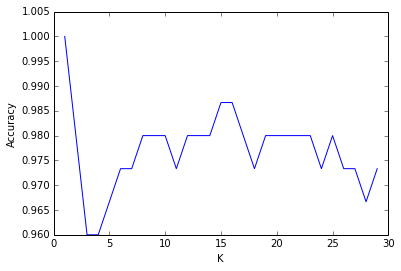

In [31]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [32]:
# K = 1, odd...
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0